![amazon_logo](banner.png)
___

# Step 2 - Preprocessing & Cleaning
    a) Importing data
    
    b) Duplicate and Missing Data
     
    c) Evaluate data
            - Overall Rating Column
            - UNIX Datetime data
            - Combine "Summary" & "Review Text"
   
   

### a) Importing data
##### Use 'amazon_data.csv' to begin cleaning

In [42]:
import pandas as pd
import numpy as np

#import .csv file
raw_amazon_df = pd.read_csv("amazon_data.csv")
raw_amazon_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [43]:
#check datatypes
print(raw_amazon_df.dtypes)
print(raw_amazon_df.shape)
raw_amazon_df.head(1)

reviewerID        object
asin              object
reviewerName      object
helpful           object
reviewText        object
overall            int64
summary           object
unixReviewTime     int64
reviewTime        object
dtype: object
(160792, 9)


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1HK2FQW6KXQB2,097293751X,"Amanda Johnsen ""Amanda E. Johnsen""","[0, 0]",Perfect for new parents. We were able to keep ...,5,Awesine,1373932800,"07 16, 2013"


### b) Duplicate and Missing Data

In [44]:
#total number of rows and columns
print('dataframe shape: ', raw_amazon_df.shape)

#rows containing duplicate data
duplicate_rows_df = raw_amazon_df[raw_amazon_df.duplicated()]

print('number of duplicate rows: ', duplicate_rows_df.shape)

dataframe shape:  (160792, 9)
number of duplicate rows:  (0, 9)


In [45]:
#finding the null values
print(raw_amazon_df.isnull().sum())

reviewerID           0
asin                 0
reviewerName      1365
helpful              0
reviewText          60
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64


In [46]:
#locate NaN
is_NaN = raw_amazon_df.isna()
row_has_NaN = raw_amazon_df.any(axis=1)
rows_with_NaN = raw_amazon_df[row_has_NaN]

#remove NaN
raw_amazon_df = raw_amazon_df.dropna()
print(raw_amazon_df.isna().sum())
print(raw_amazon_df.shape)

#reset index
raw_amazon_df.reset_index(drop=True,inplace=True)

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64
(159367, 9)


In [49]:
## total number of rows and columns
print('dataframe shape: ', raw_amazon_df.shape, '\n 1425 rows were removed')

dataframe shape:  (159367, 9) 
 1425 rows were removed


### c) Evaluate Data

##### Check 'Overall' Rating Column

In [50]:
#evaluate 'overall rating' column
raw_amazon_df['overall'].value_counts()

5    92579
4    32723
3    17144
2     9155
1     7766
Name: overall, dtype: int64

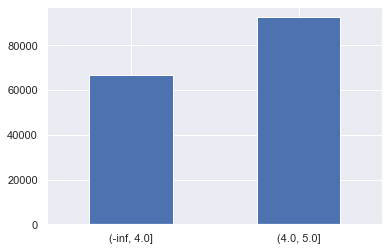

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline 
sns.set(color_codes=True)

ratings = raw_amazon_df['overall']
out = pd.cut(ratings, bins=[-np.inf, 4, 5], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))
plt.show()

##### Datetime data

In [52]:
raw_amazon_df.head(1)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1HK2FQW6KXQB2,097293751X,"Amanda Johnsen ""Amanda E. Johnsen""","[0, 0]",Perfect for new parents. We were able to keep ...,5,Awesine,1373932800,"07 16, 2013"


In [53]:
#cleaned_df.created_at = pd.to_datetime(cleaned_df.created_at, unit='s')

raw_amazon_df.loc[:, 'unixReviewTime'] = pd.to_datetime(raw_amazon_df.loc[:, 'unixReviewTime'],unit='s')


print(raw_amazon_df.dtypes)

reviewerID                object
asin                      object
reviewerName              object
helpful                   object
reviewText                object
overall                    int64
summary                   object
unixReviewTime    datetime64[ns]
reviewTime                object
dtype: object


In [54]:
#remove redundant 'reviewTime' column
raw_amazon_df.drop('reviewTime', axis=1, inplace=True)

In [55]:
raw_amazon_df.head(1)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime
0,A1HK2FQW6KXQB2,097293751X,"Amanda Johnsen ""Amanda E. Johnsen""","[0, 0]",Perfect for new parents. We were able to keep ...,5,Awesine,2013-07-16


##### Combining 'Review Text' and 'Summary' columns

In [56]:
raw_amazon_df['total_review'] = raw_amazon_df[['summary', 'reviewText']].apply(' '.join, axis=1)

In [57]:
raw_amazon_df['total_review']

0         Awesine Perfect for new parents. We were able ...
1         Should be required for all new parents! This b...
2         Grandmother watching baby Helps me know exactl...
3         repeat buyer I bought this a few times for my ...
4         Great I wanted an alternative to printing out ...
                                ...                        
159362    Great baby gift Bought this as a baby gift and...
159363    Not too bulky I am new to cloth diapering. I w...
159364    great help! My friend is planning on cloth dia...
159365    Love these diapers! We LOVE the organic cotton...
159366    Really absorbent These are great. I should hav...
Name: total_review, Length: 159367, dtype: object

### End of Step 2


In [58]:
#write raw_amazon_df to a .csv
raw_amazon_df.to_csv('cleaned_amazon_data.csv')